<a href="https://colab.research.google.com/github/MansiGit/Amazon-Gourmet-Groceries-Recommendar-System/blob/main/Data_Preprocessing_and_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls drive/MyDrive/MDM_Project_Team12/data


Grocery_and_Gourmet_Food_5.json
meta_Grocery_and_Gourmet_Food.json
meta_Grocery_and_Gourmet_Food.json.to_pickle


In [3]:
import json
import pandas as pd
import missingno as msno

##Loading Data and cleaning Reviews dataset



In [4]:
df = pd.read_json('/content/drive/MyDrive/MDM_Project_Team12/data/Grocery_and_Gourmet_Food_5.json',lines=True)

In [5]:
#Shape of the dataset
df.shape

(1143860, 12)

In [6]:
#How many dimensions
df.ndim

2

In [7]:
# describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143860 entries, 0 to 1143859
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1143860 non-null  int64 
 1   verified        1143860 non-null  bool  
 2   reviewTime      1143860 non-null  object
 3   reviewerID      1143860 non-null  object
 4   asin            1143860 non-null  object
 5   reviewerName    1143722 non-null  object
 6   reviewText      1143470 non-null  object
 7   summary         1143641 non-null  object
 8   unixReviewTime  1143860 non-null  int64 
 9   vote            158202 non-null   object
 10  style           592086 non-null   object
 11  image           9510 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 97.1+ MB


<Axes: >

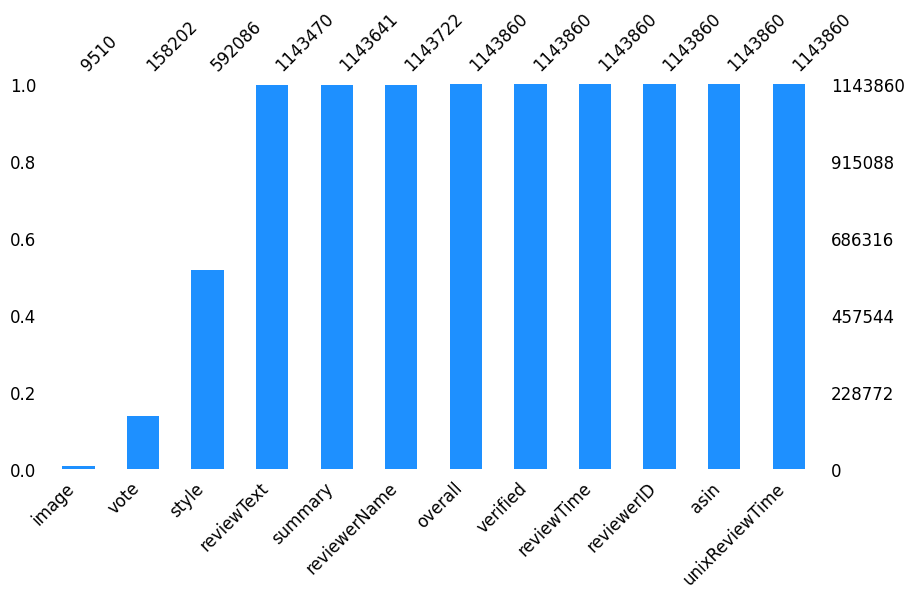

In [8]:
#finding how many missing values
missing = df.isna().sum()
msno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [9]:
#drop irrelevant variables - 'image','vote','style','reviewText','summary','reviewTime','reviewerName','unixReviewTime','verified'
drop_list = ['image','vote','style','reviewText','summary','reviewTime','reviewerName','unixReviewTime','verified']
df.drop(df[drop_list], axis=1, inplace=True)
df.head(5)

,overall,reviewerID,asin
0,5,A1QVBUH9E1V6I8,4639725183
1,5,A3GEOILWLK86XM,4639725183
2,5,A32RD6L701BIGP,4639725183
3,5,A2UY1O1FBGKIE6,4639725183
4,5,A3QHVBQYDV7Z6U,4639725183


In [10]:
#numeric data information 
numeric_features = df.select_dtypes(include=['int64','float64']).columns

#nominaldata information 
nominal_features = df.select_dtypes(include=['object'])
print(numeric_features,nominal_features)

Index(['overall'], dtype='object')              reviewerID        asin
0        A1QVBUH9E1V6I8  4639725183
1        A3GEOILWLK86XM  4639725183
2        A32RD6L701BIGP  4639725183
3        A2UY1O1FBGKIE6  4639725183
4        A3QHVBQYDV7Z6U  4639725183
...                 ...         ...
1143855  A223YRQH2Z5T1D  B01HJF6FRA
1143856  A38GDA4TB9EILT  B01HJF6FRA
1143857  A2025PN7HDC5BO  B01HJF6FRA
1143858  A1NY7XWC7EPQOA  B01HJF6FRA
1143859  A1P0X9E6F99J4T  B01HJF6FRA

[1143860 rows x 2 columns]


##Loading Data and cleaning Meta data dataset


In [11]:
meta_df = pd.read_json('/content/drive/MyDrive/MDM_Project_Team12/data/meta_Grocery_and_Gourmet_Food.json',lines=True)

In [13]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         287051 non-null  object
 1   tech1            287051 non-null  object
 2   description      287051 non-null  object
 3   fit              287051 non-null  object
 4   title            287051 non-null  object
 5   also_buy         287051 non-null  object
 6   tech2            287051 non-null  object
 7   brand            287051 non-null  object
 8   feature          287051 non-null  object
 9   rank             287051 non-null  object
 10  also_view        287051 non-null  object
 11  main_cat         287051 non-null  object
 12  similar_item     287051 non-null  object
 13  date             287051 non-null  object
 14  price            287051 non-null  object
 15  asin             287051 non-null  object
 16  imageURL         287051 non-null  object
 17  imageURLHi

In [14]:
#drop irrelvant variables - 'tech1','fit','tech2','main_cat','similar_item','date','price'
drop_list = ['tech1','feature','also_view','fit','tech2','main_cat','similar_item','date','price','also_buy','brand','rank','imageURL','imageURLHighRes','details']
meta_df.drop(meta_df[drop_list], axis=1, inplace=True)
meta_df.head(5)

,category,description,title,asin
0,"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...","[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,0681727810
1,"[Grocery & Gourmet Food, Cooking & Baking, Sug...","[Shipped from UK, please allow 10 to 21 busine...",Trim Healthy Mama Xylitol,0853347867
2,"[Grocery & Gourmet Food, Cooking & Baking, Fro...",[Jazz up your cakes with a sparkling monogram ...,Letter C - Swarovski Crystal Monogram Wedding ...,1888861118
3,"[Grocery & Gourmet Food, Cooking & Baking, Fro...","[Large Letter - Height 4.75""]",Letter H - Swarovski Crystal Monogram Wedding ...,1888861517
4,"[Grocery & Gourmet Food, Cooking & Baking, Fro...","[4.75""]",Letter S - Swarovski Crystal Monogram Wedding ...,1888861614


In [15]:
#filter out the category
# Transform dataframe
meta_df['category'] = meta_df['category'].apply(lambda x: x[1])

In [16]:
#Look for non unique values and remove the duplicates
print(len(meta_df['asin'].unique())-len(meta_df['asin']))
non_unique_asins = meta_df[meta_df.duplicated(['asin'], keep=False)]['asin'].unique()
#print(meta_df[meta_df['asin'].isin(["B0005XMOK6"])])


#dropping duplicate rows in metadata
meta_df=meta_df.drop_duplicates(subset='asin', keep='first')

-3697


### Merge the two dataframes

In [17]:
#merge metadata and reviews using an inner join
merged_df = df.merge(meta_df, on='asin', how='inner')

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143063 entries, 0 to 1143062
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   overall      1143063 non-null  int64 
 1   reviewerID   1143063 non-null  object
 2   asin         1143063 non-null  object
 3   category     1143063 non-null  object
 4   description  1143063 non-null  object
 5   title        1143063 non-null  object
dtypes: int64(1), object(5)
memory usage: 61.0+ MB


### Storing the merged dataset into a pickle


In [19]:
merged_df.to_pickle('/content/drive/MyDrive/MDM_Project_Team12/data/meta_Grocery_and_Gourmet_Food.json.to_pickle')
